# Part I: Stationary Series

- Dataset: jeans_data

## Prepare the Resiudal Dataset

In [68]:
# Load the dataset
import pandas as pd
import numpy as np
dfjeans = pd.read_excel("/content/drive/MyDrive/BA_875/Datasets/jeans_data.xls")

# Convert the numerice variable (Price) into dummy variable
dfjeans["promo_114"] = dfjeans.price == 114.75
dfjeans["promo_101"] = dfjeans.price == 101.25

In [69]:
# Fit the linear regression model using 'Price' and 'Special Event' varibales
import statsmodels.api as sm
X = sm.add_constant(dfjeans[["promo_114","promo_101"]].astype("int"))
X["se_indicator"] = dfjeans.se_indicator
olsjeans = sm.OLS(dfjeans.sales, X).fit()
olsjeans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     231.6
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           8.69e-17
Time:                        14:20:18   Log-Likelihood:                -99.689
No. Observations:                  26   AIC:                             207.4
Df Residuals:                      22   BIC:                             212.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           58.9000      2.721     21.649      0.000      53.258      64.542
promo_114       85.6000     10.301      8.310      0.000      64.238     106.962
promo_101      110.6000     10.301     10.737      0.000      89.238     131.962
se_indicator    68.7500     10.537      6.524      0.000      46.897      90.603
==============================================================================
Omnibus:                        5.466   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                1.985
Skew:                           0.268   Prob(JB):                        0.371
Kurtosis:                       1.757   Cond. No.                         6.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Add a new column for 'residual' term
dfjeans["residual"] = olsjeans.resid

In [71]:
dfjeans

,week,sales,price,special_event,se_indicator,promo_114,promo_101,residual
0,1,230,114.75,Presidents Day,1,True,False,16.75
1,2,71,135.00,NaN,0,False,False,12.10
2,3,70,135.00,NaN,0,False,False,11.10
3,4,65,135.00,NaN,0,False,False,6.10
4,5,60,135.00,NaN,0,False,False,1.10
5,6,195,114.75,Easter,1,True,False,-18.25
6,7,76,135.00,NaN,0,False,False,17.10
7,8,51,135.00,NaN,0,False,False,-7.90
8,9,79,135.00,NaN,0,False,False,20.10
9,10,146,114.75,NaN,0,True,False,1.50


## a. Moving Average (MA) Estimations

In [72]:
# Try N in [1,2,3,4,5] and forecast residual for weeks 6 to 26
# Compare the actual with forecast using MSE
from sklearn.metrics import mean_squared_error
mse_dict = {}
for index in range(1,6):
    mse = mean_squared_error(dfjeans.residual[5:26], 
                                    dfjeans.residual.rolling(index).mean()[4:25])
    mse_dict[index] = mse
    print([index, mse])

[1, 300.99404761904765]
[2, 147.49553571428572]
[3, 165.69359788359785]
[4, 149.704375]
[5, 167.24468095238097]


### When N = 2, MSE is the smallest and equal to 147.50

In [73]:
# The smallest MSE is 147.50 when N (total number of periods) is equal to 2
mse_min = min(list(mse_dict.values()))
N_mse_min = list(mse_dict.keys())[list(mse_dict.values()).index(min(list(mse_dict.values())))]
print('When N = {}, MSE is the smallest and equal to {:.2f}'.format(N_mse_min, mse_min))

When N = 2, MSE is the smallest and equal to 147.50


In [74]:
# make sure the starting and ending index matched
print(dfjeans.residual.rolling(2).mean()[4:25].shape,
dfjeans.loc[5:].shape)

(21,) (21, 8)


In [75]:
# Record the residual forecasts using Moving Average
dfjeans.loc[: ,'MA*'] = np.nan
dfjeans.loc[5:, 'MA*'] =   list(dfjeans.residual.rolling(2).mean()[4:25])
dfjeans

,week,sales,price,special_event,se_indicator,promo_114,promo_101,residual,MA*
0,1,230,114.75,Presidents Day,1,True,False,16.75,NaN
1,2,71,135.00,NaN,0,False,False,12.10,NaN
2,3,70,135.00,NaN,0,False,False,11.10,NaN
3,4,65,135.00,NaN,0,False,False,6.10,NaN
4,5,60,135.00,NaN,0,False,False,1.10,NaN
5,6,195,114.75,Easter,1,True,False,-18.25,3.600
6,7,76,135.00,NaN,0,False,False,17.10,-8.575
7,8,51,135.00,NaN,0,False,False,-7.90,-0.575
8,9,79,135.00,NaN,0,False,False,20.10,4.600
9,10,146,114.75,NaN,0,True,False,1.50,6.100


## b. Single Exponential Smoothing (ES) estimations

In [76]:
! pip install statsmodels==0.12.0

In [77]:
# Try alpha = 0.1 to 1 using 0.1 increments and forecast estimates for weeks 6 to 26
# Assume a burn-in period of 5 weeks

from statsmodels.tsa.api import ExponentialSmoothing

mse_dict = {}
for alpha in np.arange(0.1, 1.1, 0.1):
    mse = mean_squared_error(dfjeans.residual[5:26], ExponentialSmoothing(dfjeans.residual).fit(smoothing_level = alpha).predict(5,25))
    mse_dict[alpha] = mse
    print([alpha, mse])


[0.1, 144.2664909681072]
[0.2, 148.88652058715482]
[0.30000000000000004, 154.03665718992067]
[0.4, 162.2052032793972]
[0.5, 173.5291661648264]
[0.6, 188.33473251776437]
[0.7000000000000001, 207.2778013446779]
[0.8, 231.33043756445164]
[0.9, 261.8839222240343]
[1.0, 300.99404761904765]


### When alpha = 0.1, MSE is the smallest and equal to 144.27

In [78]:
# The smallest MSE is 144.27 when alpha (smoothing constant) is equal to 0.1
mse_min = min(list(mse_dict.values()))
N_mse_min = list(mse_dict.keys())[list(mse_dict.values()).index(min(list(mse_dict.values())))]
print('When alpha = {}, MSE is the smallest and equal to {:.2f}'.format(N_mse_min, mse_min))

When alpha = 0.1, MSE is the smallest and equal to 144.27


In [79]:
# Record the residual forecasts using Single Exponential Smoothing (ES)
dfjeans.loc[: ,'Single ES*'] = np.nan
dfjeans.loc[5:, 'Single ES*'] =   list(ExponentialSmoothing(dfjeans.residual).fit(smoothing_level = 0.1).predict(5,25))
dfjeans

,week,sales,price,special_event,se_indicator,promo_114,promo_101,residual,MA*,Single ES*
0,1,230,114.75,Presidents Day,1,True,False,16.75,NaN,NaN
1,2,71,135.00,NaN,0,False,False,12.10,NaN,NaN
2,3,70,135.00,NaN,0,False,False,11.10,NaN,NaN
3,4,65,135.00,NaN,0,False,False,6.10,NaN,NaN
4,5,60,135.00,NaN,0,False,False,1.10,NaN,NaN
5,6,195,114.75,Easter,1,True,False,-18.25,3.600,5.528676
6,7,76,135.00,NaN,0,False,False,17.10,-8.575,3.150809
7,8,51,135.00,NaN,0,False,False,-7.90,-0.575,4.545728
8,9,79,135.00,NaN,0,False,False,20.10,4.600,3.301155
9,10,146,114.75,NaN,0,True,False,1.50,6.100,4.981040


## c. Assess MA* versus Single ES*

- According to the plot below, we can notice that the residual forecast for Moving Average is more responsive and less smoonthing compared to that for  Single Exponential Smoonthing method. Especially, some residual forecasts using Moving Average are almost the same as the actual residual, such as week 11, 13, 16. In addition, MSE value of Moving Average is around 147.50, which is little larger than that of Single Exponential Smoothing method close to 144.27. In short, I will recommend applying the Moving Average method for the residual prediction, since that method is more repsonsive and simialr MSE value compared to Single Expoential Smoothing method.

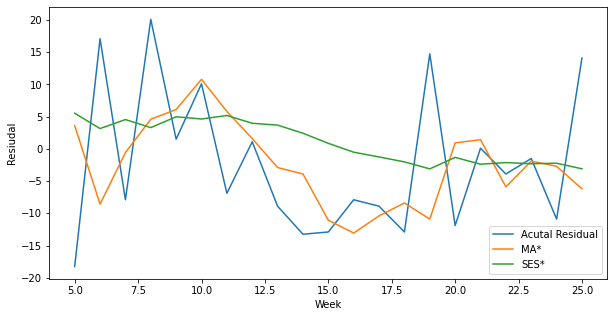

In [80]:
# plot forecast vs actual
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
#plt.plot(dfjeans.residual[:6], label='Burning Period')
plt.plot(dfjeans.residual[5:], label='Acutal Residual')
plt.plot(dfjeans['MA*'][5:], label='MA*')
plt.plot(dfjeans['Single ES*'][5:], label='SES*')
plt.legend(loc='best')
plt.xlabel('Week')
plt.ylabel('Resiudal')
plt.show()

# Part II: Non-Stationary Series with Trend

- Dataset: bitcoin_data

- You are hired as a consultant to apply your forecasting skills for predicting future outcomes of Bitcoin prices. You are given historical Bitcoin data for a range of interest. The data consists of Bitcoin price for 180 days.

## Prepare the Bitcoin Dataset

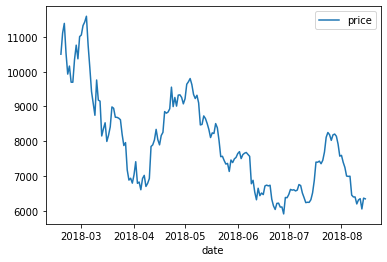

In [81]:
# .pkl is a pandas-style dataframe format
dfbitcoin = pd.read_pickle('/content/drive/MyDrive/BA_875/Datasets/bitcoin_data.pkl')

# eyeball test
# There is a pattern showing that the bitcoin price decreases over time
dfbitcoin.plot.line(x="date",y="price")

In [82]:
dfbitcoin.head()

,date,price
0,2018-02-17,10503.298333
1,2018-02-18,11110.965000
2,2018-02-19,11390.391667
3,2018-02-20,10532.791667
4,2018-02-21,9931.071667


## a. Test for non-stationarity

-  Using the Augmented Dickey-Fuller test, provide your conclusion on the nature of the data based on patterns of the Bitcoin prices over time

- Since the p-value = 0.32 > 0.05, we can't reject the null hypothesis that time series has a unit root. In other words, the bitcoin price changes over time and is non stationary, which proved our opinion from the plot above.

In [83]:
# Since the p-value = 0.32 > 0.05, we can't reject the null hypothesis that time series has a unit root. 
# In other words, the bitcoin price changes over time and is non stationary
from statsmodels.tsa.stattools import adfuller
ad_result = adfuller(dfbitcoin.price)
print('ADF Statistic: %f' % ad_result[0])
print('p-value: %f' % ad_result[1])

ADF Statistic: -1.918100
p-value: 0.323595


## b. Double Exponential Smoothing (DES) estimations

In [84]:
! pip install statsmodels --upgrade

  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


### Train test split

In [85]:
# training sample first 150 weeks
bit_train = dfbitcoin.price[:150]
bit_test = dfbitcoin.price[150:]

In [86]:
from statsmodels.tsa.api import ExponentialSmoothing

ExponentialSmoothing(bit_train,trend="add", initialization_method='estimated').fit(smoothing_level = 0.3,smoothing_trend = 0.5).predict(10,149)

10     10069.655584
11     10287.739808
12     10740.410044
13     11118.519952
14     11495.801145
           ...     
145     6332.355768
146     6175.544727
147     6074.588039
148     6063.026902
149     6181.891446
Length: 140, dtype: float64

### Calculate training sample MSE for days 11 to 150

In [87]:
# training MSE function
# allow 10 weeks of burn in period
# DES for weeks 11-150, given alpha and beta is calculated by
# alpha = smoothing_level, beta = smoothing_trend
from sklearn.metrics import mean_squared_error
import numpy as np

def DESMSE(alpha,beta):
    return mean_squared_error(bit_train[10:150],
                              ExponentialSmoothing(bit_train,trend="add", initialization_method='estimated').fit(smoothing_level = alpha,smoothing_trend = beta).predict(10,149))

### Grid search

In [88]:
# the function below allows you to construct a dataframe of alpha-beta combinations
# https://www.hackerrank.com/challenges/itertools-product/problem
from itertools import product
def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

In [89]:
# define the alpha and beta values to try as a dictionary
dictionary = {'alpha': np.arange(0.0, 1.01, 0.05), 
              'beta': np.arange(0.0, 1.01, 0.05)}

In [90]:
# construct alpha,beta values to try 
des_results = expand_grid(dictionary)
des_results

,alpha,beta
0,0.0,0.00
1,0.0,0.05
2,0.0,0.10
3,0.0,0.15
4,0.0,0.20
...,...,...
436,1.0,0.80
437,1.0,0.85
438,1.0,0.90
439,1.0,0.95


In [91]:
# add a column called mse, as a place holder for putting in the MSE results later
des_results["mse"] = np.repeat(0,len(des_results))

In [92]:
for alpha in np.arange(0.0, 1.01, 0.05):
    for beta in np.arange(0.0, 1.01, 0.05):
       des_results.loc[(des_results["alpha"] == alpha) & (des_results["beta"] == beta),"mse"] = DESMSE(alpha,beta)

In [93]:
# find the best alpha beta
des_results.sort_values("mse").head(10)

,alpha,beta,mse
399,0.95,0.00,96794.741146
420,1.00,0.00,96819.201621
378,0.90,0.00,97372.968309
357,0.85,0.00,98568.980988
400,0.95,0.05,99607.998050
421,1.00,0.05,99847.692561
379,0.90,0.05,100030.452243
336,0.80,0.00,100418.804995
358,0.85,0.05,101127.650450
401,0.95,0.10,101642.075247


In [94]:
# Add a DES* column for recording optimal DES forecast
dfbitcoin.loc[:, 'DES*'] = np.nan
dfbitcoin

,date,price,DES*
0,2018-02-17,10503.298333,NaN
1,2018-02-18,11110.965000,NaN
2,2018-02-19,11390.391667,NaN
3,2018-02-20,10532.791667,NaN
4,2018-02-21,9931.071667,NaN
...,...,...,...
175,2018-08-11,6311.131667,NaN
176,2018-08-12,6347.070000,NaN
177,2018-08-13,6050.942500,NaN
178,2018-08-14,6362.676923,NaN


In [95]:
# alpha = 0.95, beta = 0.00
# store DES(0.95,0.00) in the test sample
dfbitcoin.loc[dfbitcoin.index[150:], 'DES*'] = ExponentialSmoothing(bit_train,trend="add", initialization_method='estimated').fit(smoothing_level = 0.95,smoothing_trend = 0.00).forecast(30)

### MSE in the train and test sample

- The MSE value for the training data set is 96794.74
- The MSE value for the test data set is 917016.00

In [96]:
print('The MSE value for the training data set is {:.2f}'.format(des_results.sort_values("mse").iloc[0][2]))
print('The MSE value for the test data set is {:.2f}'.format(mean_squared_error(bit_test,dfbitcoin.loc[dfbitcoin.index[150:], 'DES*'])))

The MSE value for the training data set is 96794.74
The MSE value for the test data set is 917016.00


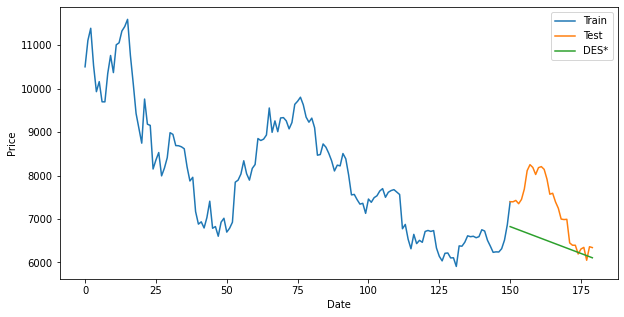

In [97]:
# plot forecast vs actual
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(dfbitcoin.price[:151], label='Train')
plt.plot(bit_test, label='Test')
plt.plot(dfbitcoin['DES*'][150:], label='DES*')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Part III: De-Seasonalizing Data and Forecasting

## a. De-seasonalize the historical data

In [98]:
# load data
# 1. month is loaded as index
# 2. convert format from wide to long
import pandas as pd
dfairline = pd.read_excel("/content/drive/MyDrive/BA_875/Datasets/airline_data.xlsx")
dfairline

,Unnamed: 0,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,January,64.40,65.28,69.77,72.68,72.30,72.95,72.82,74.89,76.55,78.02,78.89
1,February,68.10,68.60,71.58,76.07,75.71,75.91,75.28,77.35,77.92,78.90,80.77
2,March,72.43,75.13,79.58,81.31,81.57,82.19,81.08,83.39,82.70,84.43,84.99
3,April,72.13,76.17,76.64,81.34,81.38,80.09,82.10,82.55,82.13,83.61,82.81
4,May,73.98,74.41,77.52,80.39,81.27,81.34,81.32,82.51,84.58,84.45,84.84
5,June,78.58,80.72,82.27,84.56,86.24,84.24,85.37,86.32,85.98,86.62,86.98
6,July,80.98,82.20,83.94,84.95,86.24,84.11,87.09,86.90,87.14,86.83,86.46
7,August,78.74,78.74,80.34,80.90,84.89,83.35,84.97,85.20,85.59,86.61,85.53
8,September,66.93,70.39,74.12,73.78,75.61,76.07,79.42,79.81,81.82,80.64,80.90
9,October,71.47,74.23,75.94,77.50,78.45,79.76,82.22,83.32,83.63,84.23,82.77


In [99]:
# reset index
dfairline = dfairline.reset_index()
dfairline

,index,Unnamed: 0,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0,January,64.40,65.28,69.77,72.68,72.30,72.95,72.82,74.89,76.55,78.02,78.89
1,1,February,68.10,68.60,71.58,76.07,75.71,75.91,75.28,77.35,77.92,78.90,80.77
2,2,March,72.43,75.13,79.58,81.31,81.57,82.19,81.08,83.39,82.70,84.43,84.99
3,3,April,72.13,76.17,76.64,81.34,81.38,80.09,82.10,82.55,82.13,83.61,82.81
4,4,May,73.98,74.41,77.52,80.39,81.27,81.34,81.32,82.51,84.58,84.45,84.84
5,5,June,78.58,80.72,82.27,84.56,86.24,84.24,85.37,86.32,85.98,86.62,86.98
6,6,July,80.98,82.20,83.94,84.95,86.24,84.11,87.09,86.90,87.14,86.83,86.46
7,7,August,78.74,78.74,80.34,80.90,84.89,83.35,84.97,85.20,85.59,86.61,85.53
8,8,September,66.93,70.39,74.12,73.78,75.61,76.07,79.42,79.81,81.82,80.64,80.90
9,9,October,71.47,74.23,75.94,77.50,78.45,79.76,82.22,83.32,83.63,84.23,82.77


In [100]:
# wide to long
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
dfairline = pd.melt(dfairline, id_vars=['index'])
dfairline

,index,variable,value
0,0,Unnamed: 0,January
1,1,Unnamed: 0,February
2,2,Unnamed: 0,March
3,3,Unnamed: 0,April
4,4,Unnamed: 0,May
...,...,...,...
139,7,2013,85.53
140,8,2013,80.9
141,9,2013,82.77
142,10,2013,NaN


In [101]:
# rename
dfairline = dfairline.iloc[12: , :]
dfairline.columns = ["month","year","load"]

In [102]:
# de-seasonalize series
# sample average
dfairline["avg"] = dfairline.load.dropna().mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
# monthly average
# to do this simply, use the transform method, which is a not well understood function in python
# see this post for explanation: http://pbpython.com/pandas_transform.html
dfairline.loc[:,"month_avg"] = pd.to_numeric(dfairline['load']).groupby(dfairline['month']).transform('mean')
dfairline

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,month,year,load,avg,month_avg
12,0,2003,64.4,79.444692,72.595455
13,1,2003,68.1,79.444692,75.108182
14,2,2003,72.43,79.444692,80.800000
15,3,2003,72.13,79.444692,80.086364
16,4,2003,73.98,79.444692,80.600909
...,...,...,...,...,...
139,7,2013,85.53,79.444692,83.169091
140,8,2013,80.9,79.444692,76.317273
141,9,2013,82.77,79.444692,79.410909
142,10,2013,NaN,79.444692,77.834000


In [104]:
# seasonal factor
dfairline["season_factor"] = dfairline.month_avg / dfairline.avg
# de-sesonalized series
dfairline["de_load"] = dfairline.load / dfairline.season_factor
dfairline.reset_index(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [105]:
dfairline = dfairline.drop(columns={'index'})
dfairline

,month,year,load,avg,month_avg,season_factor,de_load
0,0,2003,64.4,79.444692,72.595455,0.913786,70.476013
1,1,2003,68.1,79.444692,75.108182,0.945415,72.03188
2,2,2003,72.43,79.444692,80.800000,1.017060,71.215087
3,3,2003,72.13,79.444692,80.086364,1.008077,71.552077
4,4,2003,73.98,79.444692,80.600909,1.014554,72.91876
...,...,...,...,...,...,...,...
127,7,2013,85.53,79.444692,83.169091,1.046880,81.699877
128,8,2013,80.9,79.444692,76.317273,0.960634,84.215216
129,9,2013,82.77,79.444692,79.410909,0.999575,82.805212
130,10,2013,NaN,79.444692,77.834000,0.979726,NaN


## b. Test for non-stationarity

### Augmented Dickey-Fuller test

- From the eyeball test, we guess that there is an increasing trend for the (de-seasonalized) airline load factor data over time
- However, based on the Augmented Dickey-Fuller test, since the p-value = 0.02 < 0.05, we reject the null hypothesis that time series has a unit root. 
- In other words, the the (de-seasonalized) airline load factor doesn't change over time and is stationary

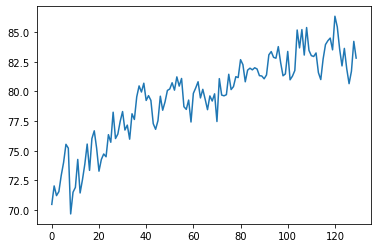

In [106]:
dfairline["de_load"][:-2].plot.line(x="index",y="de_load")

In [107]:
# Since the p-value = 0.02 < 0.05, we reject the null hypothesis that time series has a unit root. 
# In other words, the the (de-seasonalized) airline load factor doesn't change over time and is stationary
from statsmodels.tsa.stattools import adfuller
ad_result = adfuller(dfairline["de_load"][:-2])
print('ADF Statistic: %f' % ad_result[0])
print('p-value: %f' % ad_result[1])

ADF Statistic: -3.194312
p-value: 0.020316


### 1.Moving Average (MA) Estimations

In [108]:
dfairline["de_load"][12:130].shape

(118,)

In [109]:
dfairline.de_load.rolling(12).mean()[11:129].shape

(118,)

In [110]:
# Try N from 1 to 12
# Compare the actual with forecast using MSE
from sklearn.metrics import mean_squared_error
mse_dict = {}
for index in range(1,13):
    mse = mean_squared_error(dfairline["de_load"][12:130],
                                   dfairline.de_load.rolling(index).mean()[11:129])
    mse_dict[index] = mse
    print([index, mse])

[1, 1.8800925208667427]
[2, 1.6363666578982463]
[3, 1.7025301776356834]
[4, 1.6954047085357142]
[5, 1.9473409804616415]
[6, 2.1256698103340175]
[7, 2.1885361189184933]
[8, 2.17842074575255]
[9, 2.1851488689247933]
[10, 2.189348409518572]
[11, 2.1396945364498134]
[12, 2.0825657495172902]


#### When N = 2, MSE is the smallest and equal to 1.64

In [111]:
# The smallest MSE is 1.64 when N (total number of periods) is equal to 2
mse_min = min(list(mse_dict.values()))
N_mse_min = list(mse_dict.keys())[list(mse_dict.values()).index(min(list(mse_dict.values())))]
print('When N = {}, MSE is the smallest and equal to {:.2f}'.format(N_mse_min, mse_min))

When N = 2, MSE is the smallest and equal to 1.64


###  2.Single Exponential Smoothing (ES) estimations

In [112]:
! pip install statsmodels==0.12.0

  Using cached statsmodels-0.12.0-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2


In [113]:
ExponentialSmoothing(pd.to_numeric(dfairline.de_load[:130])).fit(smoothing_level = 0.1).predict(12,129)

12     72.787482
13     72.652637
14     72.643449
15     72.766084
16     73.045446
         ...    
125    83.517675
126    83.357817
127    83.087091
128    82.948370
129    83.075055
Length: 118, dtype: float64

In [114]:
dfairline["de_load"][12:130]

12     71.439039
13     72.560749
14     73.869799
15     75.559708
16     73.342592
         ...    
125    81.919098
126    80.650558
127    81.699877
128    84.215216
129    82.805212
Name: de_load, Length: 118, dtype: object

In [115]:
mean_squared_error(list(dfairline["de_load"][12:130]),list(ExponentialSmoothing(pd.to_numeric(dfairline.de_load[:130])).fit(smoothing_level = 0.5).predict(12,129)))

1.559481743341416

In [116]:
# Try alpha = 0.1 to 1 using 0.1 increments 
# Calculate Training MSE

from statsmodels.tsa.api import ExponentialSmoothing

mse_dict = {}
for alpha in np.arange(0.1, 1.1, 0.1):
    mse = mean_squared_error(dfairline["de_load"][12:130], ExponentialSmoothing(pd.to_numeric(dfairline.de_load[:130])).fit(smoothing_level = alpha).predict(12,129))
    mse_dict[alpha] = mse
    print([alpha, mse])


[0.1, 2.594250177733436]
[0.2, 1.8485548939422645]
[0.30000000000000004, 1.6682123192306535]
[0.4, 1.5915389611102275]
[0.5, 1.559481743341416]
[0.6, 1.5621865359647624]
[0.7000000000000001, 1.5965867894626107]
[0.8, 1.6607185407945735]
[0.9, 1.754236268735851]
[1.0, 1.8800925208667427]


#### When alpha = 0.5, MSE is the smallest and equal to 1.56

In [117]:
# The smallest MSE is 1.56, when alpha (smoothing constant) is equal to 0.5
mse_min = min(list(mse_dict.values()))
N_mse_min = list(mse_dict.keys())[list(mse_dict.values()).index(min(list(mse_dict.values())))]
print('When alpha = {}, MSE is the smallest and equal to {:.2f}'.format(N_mse_min, mse_min))

When alpha = 0.5, MSE is the smallest and equal to 1.56


### 3.Assess MA* versus Single ES*

- According to MSE values for MA and SES, In short, I will recommend applying the SES method for the de_load factor prediction, since that its MSE is less than the MSE of MA

### 4. Final Prediction (scale back by the seasonal factor)
- Final Forecasts (USING SES Method)




```
month  year   SES_load
130     10  2013  81.197042
131     11  2013  80.929981
```






In [131]:
dfairline.de_load.rolling(2).mean()[129]

83.51021412828192

In [124]:
dfairline.de_load.rolling(2).mean()

0            NaN
1      71.253946
2      71.623484
3      71.383582
4      72.235418
         ...    
127    81.175218
128    82.957547
129    83.510214
130          NaN
131          NaN
Name: de_load, Length: 132, dtype: float64

In [119]:
dfairline.loc[130:131,'MA_load'] = dfairline.loc[130:131,'season_factor'] * dfairline.de_load.rolling(2).mean()[129]
dfairline

,month,year,load,avg,month_avg,season_factor,de_load,MA_load
0,0,2003,64.4,79.444692,72.595455,0.913786,70.476013,NaN
1,1,2003,68.1,79.444692,75.108182,0.945415,72.03188,NaN
2,2,2003,72.43,79.444692,80.800000,1.017060,71.215087,NaN
3,3,2003,72.13,79.444692,80.086364,1.008077,71.552077,NaN
4,4,2003,73.98,79.444692,80.600909,1.014554,72.91876,NaN
...,...,...,...,...,...,...,...,...
127,7,2013,85.53,79.444692,83.169091,1.046880,81.699877,NaN
128,8,2013,80.9,79.444692,76.317273,0.960634,84.215216,NaN
129,9,2013,82.77,79.444692,79.410909,0.999575,82.805212,NaN
130,10,2013,NaN,79.444692,77.834000,0.979726,NaN,81.817096


In [125]:
ExponentialSmoothing(pd.to_numeric(dfairline.de_load[:130])).fit(smoothing_level = 0.5).forecast(2)

130    82.877329
131    82.877329
dtype: float64

In [126]:
dfairline.loc[130:131,'SES_load'] = dfairline.loc[130:131,'season_factor'] * ExponentialSmoothing(pd.to_numeric(dfairline.de_load[:130])).fit(smoothing_level = 0.5).forecast(2)
dfairline

,month,year,load,avg,month_avg,season_factor,de_load,MA_load,SES_load
0,0,2003,64.4,79.444692,72.595455,0.913786,70.476013,NaN,NaN
1,1,2003,68.1,79.444692,75.108182,0.945415,72.03188,NaN,NaN
2,2,2003,72.43,79.444692,80.800000,1.017060,71.215087,NaN,NaN
3,3,2003,72.13,79.444692,80.086364,1.008077,71.552077,NaN,NaN
4,4,2003,73.98,79.444692,80.600909,1.014554,72.91876,NaN,NaN
...,...,...,...,...,...,...,...,...,...
127,7,2013,85.53,79.444692,83.169091,1.046880,81.699877,NaN,NaN
128,8,2013,80.9,79.444692,76.317273,0.960634,84.215216,NaN,NaN
129,9,2013,82.77,79.444692,79.410909,0.999575,82.805212,NaN,NaN
130,10,2013,NaN,79.444692,77.834000,0.979726,NaN,81.817096,81.197042


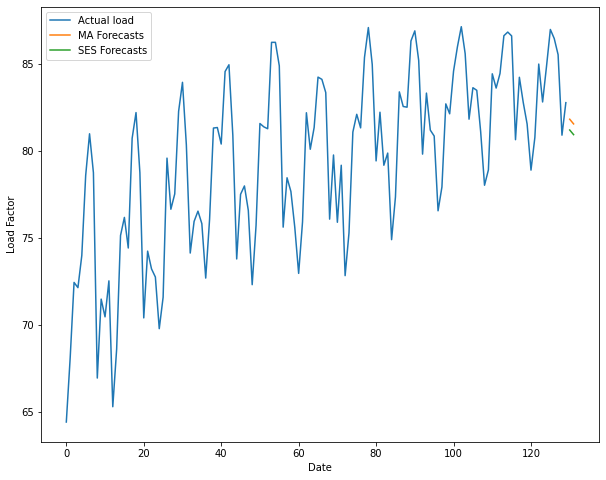


      month  year   SES_load
130     10  2013  81.197042
131     11  2013  80.929981


In [127]:
# plot forecast vs actual
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(dfairline.load[:130], label='Actual load')
plt.plot(dfairline['MA_load'][130:], label='MA Forecasts')
plt.plot(dfairline['SES_load'][130:], label='SES Forecasts')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Load Factor')
plt.show()

print('\n',dfairline.loc[130:131, ('month','year','SES_load')])